In [3]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

#Set directory
current_directory_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/"
os.chdir(current_directory_path)

# ML Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load Preprocessed Data

In [4]:
# Set path to the data and models
dataset_dir = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/"

# Iterate through files in the folder
for file_name in os.listdir(dataset_dir):
    # Check if the file has .pkl extension
    if file_name.endswith('.pkl'):
        # Load the pickle file
        file_path = os.path.join(dataset_dir, file_name)
        with open(file_path, 'rb') as file:
            images, labels = pickle.load(file)
            
        # Convert to numpy arrays
        images, labels = np.array(images), np.array(labels)
        
        # Assign loaded data to variables with modified names
        # Remove .pkl extension from the file name
        variable_name = os.path.splitext(file_name)[0]
        # Assign loaded data to variables with modified names
        globals()[f"{variable_name}_images"] = images
        globals()[f"{variable_name}_labels"] = labels

        # Optionally, you can print the loaded data for verification
        print(f"Loaded {variable_name}_images with length {images.shape}")
        print(f"Loaded {variable_name}_labels with length {len(labels)}")

Loaded dual_main_test_images with length (425, 256, 256)
Loaded dual_main_test_labels with length 425
Loaded dual_main_train_images with length (3360, 256, 256)
Loaded dual_main_train_labels with length 3360
Loaded dual_main_val_images with length (420, 256, 256)
Loaded dual_main_val_labels with length 420
Loaded dual_uh_test_images with length (212, 256, 256)
Loaded dual_uh_test_labels with length 212
Loaded dual_uh_train_images with length (1680, 256, 256)
Loaded dual_uh_train_labels with length 1680
Loaded dual_uh_val_images with length (210, 256, 256)
Loaded dual_uh_val_labels with length 210


# Consistency Across Models

In [5]:
img_height = 256
img_width = 256
input_shape = (256, 256, 1)

# Main Model

In [6]:
num_classes = 1

In [7]:
Main_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [8]:
Main_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [9]:
Main_history = Main_model.fit(dual_main_train_images, dual_main_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(dual_main_val_images, dual_main_val_labels))

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.6721 - loss: 43.1185 - val_accuracy: 0.8929 - val_loss: 0.3301
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9413 - loss: 0.1950 - val_accuracy: 0.9000 - val_loss: 0.3053
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9768 - loss: 0.0737 - val_accuracy: 0.9333 - val_loss: 0.2729
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9901 - loss: 0.0311 - val_accuracy: 0.9333 - val_loss: 0.2915
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9962 - loss: 0.0152 - val_accuracy: 0.9405 - val_loss: 0.3214
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9960 - loss: 0.0166 - val_accuracy: 0.9333 - val_loss: 0.4583
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.9911 - loss: 0.0347 - val_accuracy: 0.9381 - val_loss: 0.4049
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9922 - loss: 0.0233 - val_acc

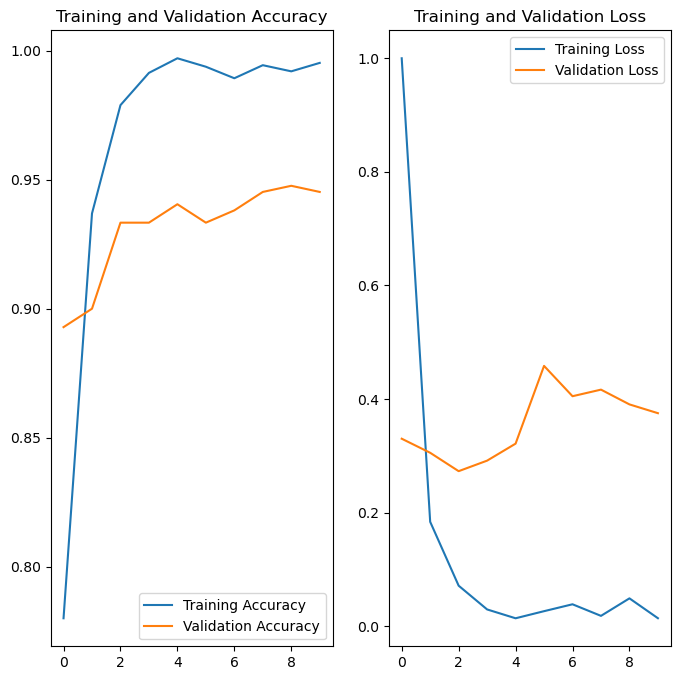

In [28]:
epochs = 10
acc = Main_history.history['accuracy']
val_acc = Main_history.history['val_accuracy']

loss = [min([x, 1]) for x in Main_history.history['loss']]
val_loss = [min([x, 1]) for x in Main_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
test_loss, test_accuracy = Main_model.evaluate(dual_main_test_images, dual_main_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9610 - loss: 0.4557 
Test Loss: 0.7952123880386353
Test Accuracy: 0.9200000166893005


In [12]:
#Main_model.summary()

### Save the model and training history

In [30]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/Main_model.keras"

# Save the trained model to the specified file path
Main_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/Main_model.keras


# Unhealthy Model

In [21]:
num_classes = 3

In [22]:
UH_model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(6, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='sigmoid')
])

In [23]:
UH_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [24]:
UH_history = UH_model.fit(dual_uh_train_images, dual_uh_train_labels,
                          epochs=10,
                          batch_size=32,
                          validation_data=(dual_uh_val_images, dual_uh_val_labels))

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5020 - loss: 38.8501 - val_accuracy: 0.6143 - val_loss: 1.8454
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.7606 - loss: 1.0540 - val_accuracy: 0.6238 - val_loss: 1.6695
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8183 - loss: 0.5292 - val_accuracy: 0.6143 - val_loss: 0.9792
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.8358 - loss: 0.3916 - val_accuracy: 0.5524 - val_loss: 1.3767
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8517 - loss: 0.3619 - val_accuracy: 0.5810 - val_loss: 0.8419
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.8577 - loss: 0.3857 - val_accuracy: 0.5810 - val_loss: 1.3619
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8515 - loss: 0.3879 - val_accuracy: 0.5810 - val_loss: 0.9405
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8683 - loss: 0.3033 - val_accuracy: 0.5810 - 

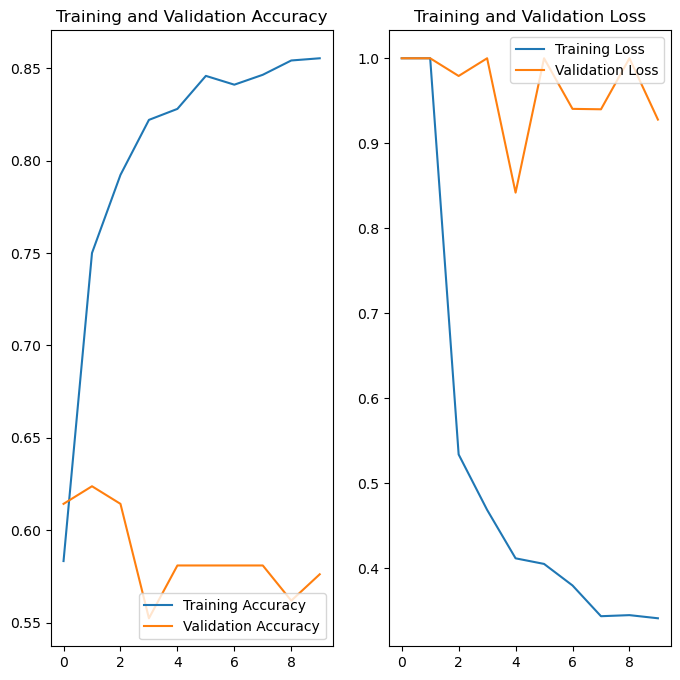

In [27]:
epochs = 10
acc = UH_history.history['accuracy']
val_acc = UH_history.history['val_accuracy']

loss = [min([x, 1]) for x in UH_history.history['loss']]
val_loss = [min([x, 1]) for x in UH_history.history['val_loss']]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
test_loss, test_accuracy = UH_model.evaluate(dual_uh_test_images, dual_uh_test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4831 - loss: 1.6249
Test Loss: 1.1356898546218872
Test Accuracy: 0.6179245114326477


In [27]:
#UH_model.summary()

### Save the model and training history

In [29]:
# Specify the file path where you want to save the model
model_save_path = r"C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/UH_model.keras"

# Save the trained model to the specified file path
UH_model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

Model saved successfully at: C:\\Users\\atr8e/OneDrive/Documents/MSDS/2024_Spring/DS_6050/Project/Milestone_3/Models_and_Datasets/Dual_Model/UH_model.keras
